<a href="https://colab.research.google.com/github/hslee1539/rc-ai/blob/master/rc_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/hslee1539/rc-ai

Cloning into 'rc-ai'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 125 (delta 12), reused 21 (delta 9), pack-reused 98
Receiving objects: 100% (125/125), 280.57 MiB | 48.42 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Checking out files: 100% (87/87), done.


In [ ]:
!ls

rc-ai  sample_data


In [ ]:
import sys

sys.path.append("./rc-ai/src")

In [ ]:
import data
import numpy as np

data_model = data.DataModel("./rc-ai/data/x", "./rc-ai/data/y", (256, 256, 3), (256, 256, 3), (50, 50, 2))
result = data.load(data_model)

x_train = np.array(result[0], dtype=data_model.dtype) / 255
y_train = (np.array(result[1], dtype=data_model.dtype) / 255)
x_eval = np.array(result[2], dtype=data_model.dtype) / 255
y_eval = (np.array(result[3], dtype=data_model.dtype) / 255)
x_test = np.array(result[4], dtype=data_model.dtype) / 255
y_test = (np.array(result[5], dtype=data_model.dtype) / 255)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
process angle = 90
process angle = 218
process angle = 220
process angle = 92
process angle = 94
process angle = 222
process angle = 224
process angle = 226
process angle = 96
process angle = 98
process angle = 100
process angle = 102
process angle = 104
process angle = 106
process angle = 108
process angle = 110
process angle = 112
process angle = 114
process angle = 116
process angle = 118
process angle = 120
process angle = 122
process angle = 124
process angle = 126
process angle = 128
process angle = 130
process angle = 132
process angle = 134
process angle = 136
process angle = 138
process angle = 210
process angle = 140
process angle = 212
process angle = 142
process angle = 214
process angle = 144
process angle = 216
process angle = 146
process angle = 148
process angle = 218
process angle = 220
process angle = 150
process angle = 152
process angle = 222
process angle = 154
process angle = 156
process angle = 224
process angle = 158
process a

In [ ]:
del network

import network
import matplotlib.pyplot as plt
# 13320 * 256

net = load()

net.summary()

no_trained_y = net.predict(x_test)


net.fit(x_train, y_train, epochs=15, batch_size=100, validation_data=(x_eval, y_eval))

trained_y = net.predict(x_test)

trained_y2 = net.predict(x_train, 100)

real_y = y_test

no_trained_y = np.insert(no_trained_y, 2, 0, -1)

trained_y = np.insert(trained_y, 2, 0, -1)

trained_y2 = np.insert(trained_y2, 2, 0, -1)

real_y = np.insert(real_y, 2, 0, -1)


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (1, 254, 254, 5)          140       
_________________________________________________________________
batch_normalization_89 (Batc (1, 254, 254, 5)          20        
_________________________________________________________________
conv2d_110 (Conv2D)          (1, 125, 125, 7)          882       
_________________________________________________________________
batch_normalization_90 (Batc (1, 125, 125, 7)          28        
_________________________________________________________________
conv2d_111 (Conv2D)          (1, 119, 119, 13)         4472      
_________________________________________________________________
batch_normalization_91 (Batc (1, 119, 119, 13)         52        
_________________________________________________________________
conv2d_112 (Conv2D)          (1, 54, 54, 17)         

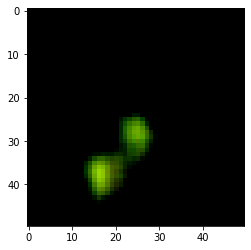

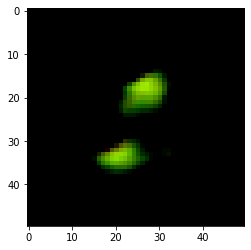

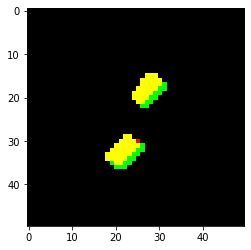

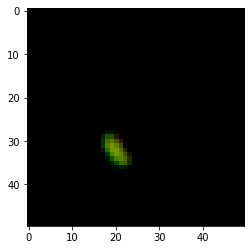

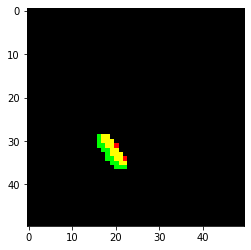

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


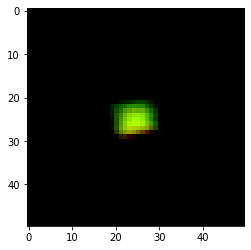

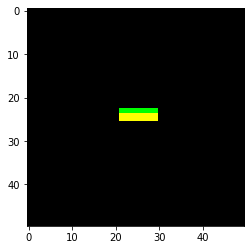

In [ ]:
plt.imshow(trained_y2[0], vmin=0., vmax=1.)
plt.show()
for i in range(3):
    #plt.imshow(no_trained_y[i], vmin=0., vmax=1.)
    #plt.show()
    plt.imshow(trained_y[i], vmin=0., vmax=1.)
    plt.show()
    plt.imshow(real_y[i], vmin=0., vmax=1.)
    plt.show()

In [ ]:
net.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 5)       140       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 5)       20        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 7)       882       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 7)       28        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 13)      4472      
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 126, 13)      52        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 17)        2

In [ ]:
import tensorflow as tf
def load():
    """"""
    model: tf.keras.Model

    try:
        model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    except Exception as identifier:
        # 모델이 없는 경우
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(
            filters=5, kernel_size=(3, 3), strides=1, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(
            filters=7, kernel_size=(5, 5), strides=2, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(
            filters=13, kernel_size=(7, 7), strides=1, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(
            filters=17, kernel_size=(13, 13), strides=2, activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Conv2D(
            filters=2, kernel_size=(5,5), strides=1,activation="relu"))
        model.build((1, 256, 256, 3))
        #model.compile(optimizer="adam", loss="binary_crossentropy")
        model.compile(optimizer="adam", loss="MeanSquaredLogarithmicError")

    return model

test_model = load()
test_model.summary()
del test_model

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (1, 254, 254, 5)          140       
_________________________________________________________________
batch_normalization_77 (Batc (1, 254, 254, 5)          20        
_________________________________________________________________
conv2d_95 (Conv2D)           (1, 125, 125, 7)          882       
_________________________________________________________________
batch_normalization_78 (Batc (1, 125, 125, 7)          28        
_________________________________________________________________
conv2d_96 (Conv2D)           (1, 119, 119, 13)         4472      
_________________________________________________________________
batch_normalization_79 (Batc (1, 119, 119, 13)         52        
_________________________________________________________________
conv2d_97 (Conv2D)           (1, 54, 54, 17)         